In [1]:
'''
Scikit Learn dataset loading utilities
http://scikit-learn.org/stable/datasets/index.html
'''
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# load digits data
digits = datasets.load_digits()

In [3]:
# print keys of digits
print(digits.keys())
print("")

# print information of digits data
print("* digits data\n", digits.data)
print("(samples total, dimensionality) =", digits.data.shape)
print("")

# print information of digits target
print("* digits target\n", digits.target)
print("(samples total,) =", digits.target.shape)
print("")

# print information of digits target_names
print("* digits target_names\n", digits.target_names)
print("(target names total,) =", digits.target_names.shape)
print("")

# print discription of digits
print("* digits DESCR\n", digits.DESCR)
print("")

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

* digits data
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
(samples total, dimensionality) = (1797, 64)

* digits target
 [0 1 2 ..., 8 9 8]
(samples total,) = (1797,)

* digits target_names
 [0 1 2 3 4 5 6 7 8 9]
(target names total,) = (10,)

* digits DESCR
 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwr

In [4]:
# isolate digits data, digits target and digits images
digits_data = digits.data
digits_target = digits.target
digits_images = digits.images

In [5]:
import pandas as pd

In [ ]:
# load data digits
digits_alternative = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

In [ ]:
# print information of digits data
print(digits_alternative.describe)

In [5]:
import matplotlib.pyplot as plt

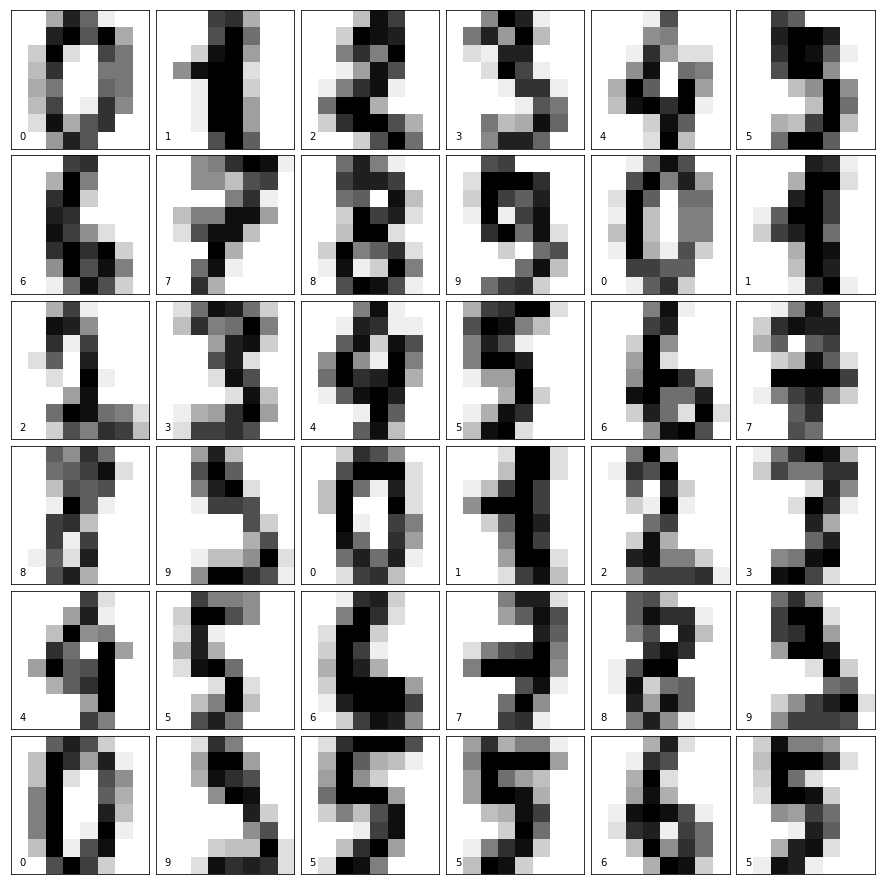

In [7]:
# set figure size
fig = plt.figure(figsize=(12, 12))

# adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# loop over the first 36 images
for i in range(36):
    # initialize the subplots
    # add a subplot in the grid of 6 by 6, at the i+1-th position
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    # display an image
    ax.imshow(digits_images[i], cmap=plt.cm.binary, interpolation='nearest')
    # add label (target value)
    ax.text(0, 7, str(digits_target[i]))

# show the plot
plt.show()

In [6]:
from sklearn.decomposition import PCA

In [7]:
# set a PCA model that runs randomized SVD
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# fit and transform digits_data to the model
reduced_data_rpca = randomized_pca.fit_transform(digits_data)

# show informattion of reduced_data_rpca
print(reduced_data_rpca.shape)
print(reduced_data_rpca)

(1797, 2)
[[ -1.25946961  21.27488447]
 [  7.95760437 -20.76869573]
 [  6.99192834  -9.95598829]
 ..., 
 [ 10.80128656  -6.96025272]
 [ -4.87209481  12.42395061]
 [ -0.34438078   6.36554552]]


In [8]:
# create a PCA model
pca = PCA(n_components=2)

# fit and transform digits_data to the model
reduced_data_pca = pca.fit_transform(digits_data)

# show informattion of reduced_data_pca
print(reduced_data_pca.shape)
print(reduced_data_pca)

(1797, 2)
[[ -1.25946775  21.27488916]
 [  7.9576098  -20.76869209]
 [  6.9919246   -9.95599385]
 ..., 
 [ 10.8012827   -6.96024703]
 [ -4.87210262  12.42396302]
 [ -0.34438929   6.36554796]]


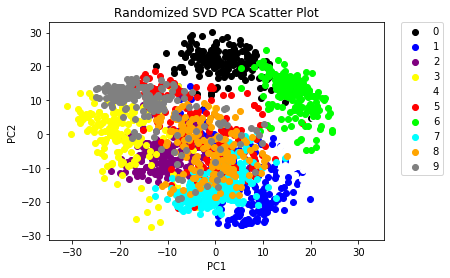

In [9]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits_target == i]
    y = reduced_data_rpca[:, 1][digits_target == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Randomized SVD PCA Scatter Plot")
plt.show()

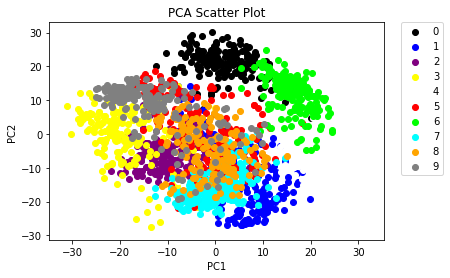

In [10]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
    x = reduced_data_pca[:, 0][digits_target == i]
    y = reduced_data_pca[:, 1][digits_target == i]
    plt.scatter(x, y, c=colors[i])
    
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Scatter Plot")
plt.show()

In [11]:
from sklearn.preprocessing import scale

In [12]:
# normalize the digits_data
normalized_digits_data = scale(digits_data)

# print information of normalized digits data
print("* normalized digits_data\n", normalized_digits_data)
print("(samples total, dimensionality) =", normalized_digits_data.shape)

* normalized digits_data
 [[ 0.         -0.33501649 -0.04308102 ..., -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...,  1.56568555  1.6951369
  -0.19600752]
 ..., 
 [ 0.         -0.33501649 -0.88456568 ..., -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...,  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...,  0.8876023  -0.26113572
  -0.19600752]]
(samples total, dimensionality) = (1797, 64)


In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(digits_data, 
                                                                               digits.target, 
                                                                               digits.images, 
                                                                               test_size=0.25, 
                                                                               random_state=21)

In [15]:
print("training data")
print("(samples total, dimensionality) =", X_train.shape)
print("(samples total,) =", y_train.shape)
print(len(np.unique(y_train)))
print("")

print("test data")
print("(samples total, dimensionality) =", X_test.shape)
print("(samples total,) =", y_test.shape)
print(len(np.unique(y_test)))
print("")

training data
(samples total, dimensionality) = (1347, 64)
(samples total,) = (1347,)
10

test data
(samples total, dimensionality) = (450, 64)
(samples total,) = (450,)
10



In [16]:
from sklearn import cluster

In [36]:
# create a kmeans model with 10 clusters
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=21)

# fit X_train to the model
clf.fit(X_train)

# show the shape of the cluster centers
print("(total cluster centers, dimensionality) =", clf.cluster_centers_.shape)

(total cluster centers, dimensionality) = (10, 64)


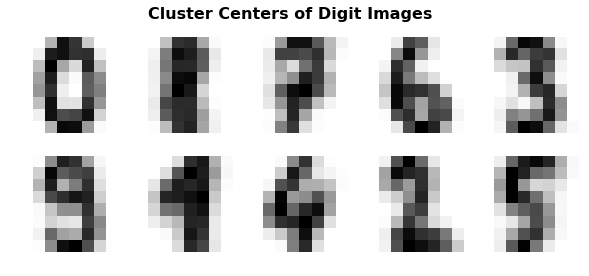

In [37]:
# set figure size
fig = plt.figure(figsize=(10, 4))

# set title
fig.suptitle('Cluster Centers of Digit Images', fontsize=16, fontweight='bold')

# loop over all labels (0-9)
for i in range(10):
    # initialize subplots in a grid of 2 by 5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # display images
    ax.imshow(clf.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    # remove the axes
    plt.axis('off')

# show the plot
plt.show()

In [38]:
# predict the labels for X_test
y_pred=clf.predict(X_test)

# join y_pred and y_test into a list
pred_and_test = list(zip(y_pred, y_test))

# display the first 25 instance pairs of of y_pred and y_test
print("the first 25 instance pairs of of y_pred and y_test")
for index, (label_pred, label_test) in enumerate(pred_and_test[:25]):
    print("predicted , test =", label_pred, ",", label_test)

print("")

num_of_hit = 0
for index, (label_pred, label_test) in enumerate(pred_and_test[:25]):
    if label_pred == label_test:
        num_of_hit +=1

        
print("hit rate:", num_of_hit, "/", len(y_test))

the first 25 instance pairs of of y_pred and y_test
predicted , test = 3 , 6
predicted , test = 1 , 1
predicted , test = 1 , 1
predicted , test = 2 , 8
predicted , test = 7 , 4
predicted , test = 9 , 5
predicted , test = 9 , 5
predicted , test = 9 , 5
predicted , test = 0 , 0
predicted , test = 6 , 1
predicted , test = 7 , 4
predicted , test = 6 , 2
predicted , test = 3 , 6
predicted , test = 5 , 9
predicted , test = 8 , 2
predicted , test = 4 , 3
predicted , test = 1 , 8
predicted , test = 2 , 2
predicted , test = 4 , 3
predicted , test = 8 , 2
predicted , test = 1 , 8
predicted , test = 8 , 2
predicted , test = 4 , 3
predicted , test = 9 , 5
predicted , test = 2 , 7

hit rate: 4 / 450
